In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/My Drive/hrv dataset/hrv dataset/data/final/train.csv')
count_row = df.shape[0]
print('total no of dataset : ',count_row)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#since the number of data is very high, we are only taking 400 samples form no stress case and 400 form time pressure case
dt1 = (df[df['condition']=='no stress'][0:400])  
dt2 = (df[df['condition']=='time pressure'][0:400])
dt =pd.concat([dt1,dt2])
count_row = dt.shape[0]
print('total no of new dataset : ',count_row)

total no of new dataset :  800


In [ ]:
#cheaking data types
dt.dtypes

MEAN_RR              float64
MEDIAN_RR            float64
SDRR                 float64
RMSSD                float64
SDSD                 float64
SDRR_RMSSD           float64
HR                   float64
pNN25                float64
pNN50                float64
SD1                  float64
SD2                  float64
KURT                 float64
SKEW                 float64
MEAN_REL_RR          float64
MEDIAN_REL_RR        float64
SDRR_REL_RR          float64
RMSSD_REL_RR         float64
SDSD_REL_RR          float64
SDRR_RMSSD_REL_RR    float64
KURT_REL_RR          float64
SKEW_REL_RR          float64
VLF                  float64
VLF_PCT              float64
LF                   float64
LF_PCT               float64
LF_NU                float64
HF                   float64
HF_PCT               float64
HF_NU                float64
TP                   float64
LF_HF                float64
HF_LF                float64
sampen               float64
higuci               float64
datasetId     

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
X = dt.drop(['condition'], axis = 1)
Y = dt['condition']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, Y).transform(X)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

Original number of features: 35
Reduced number of features: 1


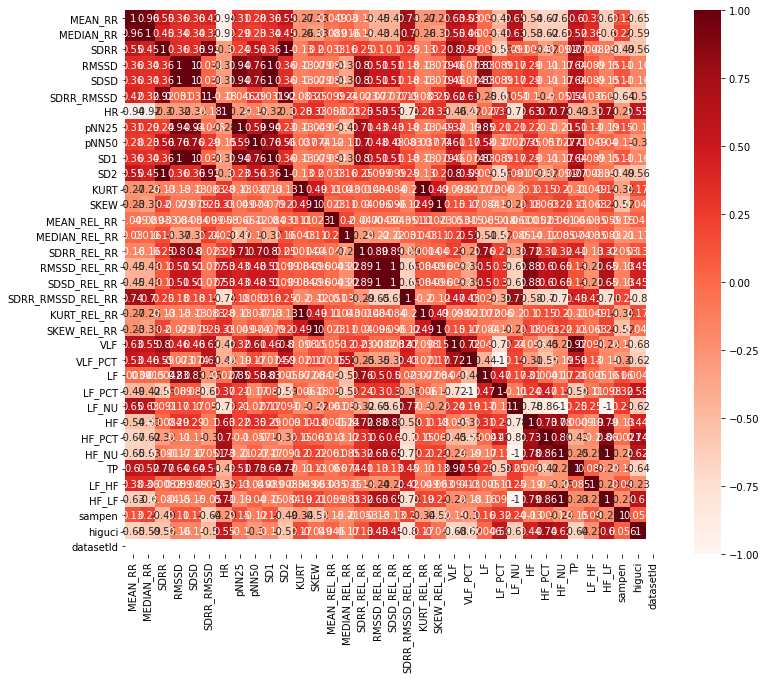

In [ ]:
plt.figure(figsize=(12,10))
cor = dt.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_lda, Y, test_size=0.25,random_state=109) # 70% training and 30% test
#Import svm model

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.76


In [ ]:
dt.to_csv(r'/content/Datafile.csv')